In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import torch
import torch.nn as nn
import plotly.express as px

# MIND

In [2]:
data = '../data/MIND_small_metrics_bucket/mind_news_metrics_bucket_acc.pkl'
df = pd.read_pickle(data)

# Adding day for dropdown
df['day'] = df['time_bucket_start_hour'].dt.date

print(df.shape)
df.head(1)

(243992, 15)


time_bucket news_id time_bucket_end_hour  \
0  11/09/2019 09:00 to 10:00  N10005  2019-11-09 10:00:00   

  time_bucket_start_hour  num_clicks  exposures  total_impressions       epi  \
0    2019-11-09 09:00:00           0          1              29839  0.001258   

    av  total_clicks  clicks_ratio  epi_idx  av_idx        news_pb_time  \
0  1.0          8966           0.0        0       4 2019-11-09 09:20:40   

          day  
0  2019-11-09

In [3]:
days = df['day'].unique()
print(days[0])
df = df.loc[df['day'] == days[0]]
df = df.sort_values('time_bucket_start_hour')
df

2019-11-09


time_bucket news_id time_bucket_end_hour  \
85006   11/09/2019 00:00 to 01:00  N26130  2019-11-09 01:00:00   
85330   11/09/2019 00:00 to 01:00  N48352  2019-11-09 01:00:00   
85331   11/09/2019 00:00 to 01:00   N4836  2019-11-09 01:00:00   
85332   11/09/2019 00:00 to 01:00  N48445  2019-11-09 01:00:00   
85333   11/09/2019 00:00 to 01:00  N48476  2019-11-09 01:00:00   
...                           ...     ...                  ...   
197472  11/09/2019 23:00 to 00:00  N41569  2019-11-10 00:00:00   
197471  11/09/2019 23:00 to 00:00  N41555  2019-11-10 00:00:00   
197470  11/09/2019 23:00 to 00:00  N41480  2019-11-10 00:00:00   
197484  11/09/2019 23:00 to 00:00  N42416  2019-11-10 00:00:00   
197624  11/09/2019 23:00 to 00:00  N53008  2019-11-10 00:00:00   

       time_bucket_start_hour  num_clicks  exposures  total_impressions  \
85006     2019-11-09 00:00:00           0         38               6257   
85330     2019-11-09 00:00:00           0          1               6257   
85331     2019-11-09 00:00:00           0          2               6257   
85332     2019-11-09 00:00:00           0          1               6257   
85333     2019-11-09 00:00:00           0          9               6257   
...                       ...         ...        ...                ...   
197472    2019-11-09 23:00:00          61       1065             518272   
197471    2019-11-09 23:00:00           8        380             524529   
197470    2019-11-09 23:00:00           0          5              52922   
197484    2019-11-09 23:00:00           0         16             247433   
197624    2019-11-09 23:00:00           5        197             504487   

             epi        av  total_clicks  clicks_ratio  epi_idx  av_idx  \
85006   0.258373  1.000000           244      0.000000        1       4   
85330   0.006635  1.000000           244      0.000000        0       4   
85331   0.013439  1.000000           244      0.000000        0       4   
85332   0.006635  1.000000           244      0.000000        0       4   
85333   0.061065  1.000000           244      0.000000        0       4   
...          ...       ...           ...           ...      ...     ...   
197472  0.087311  0.942723         14071      0.028557        0       3   
197471  0.030672  0.978947         14071      0.003745        0       3   
197470  0.003853  1.000000         14071      0.000000        0       4   
197484  0.002584  1.000000         14071      0.000000        0       4   
197624  0.016455  0.974619         14071      0.002341        0       3   

              news_pb_time         day  
85006  2019-11-09 00:02:50  2019-11-09  
85330  2019-11-09 00:04:19  2019-11-09  
85331  2019-11-09 00:45:07  2019-11-09  
85332  2019-11-09 00:59:42  2019-11-09  
85333  2019-11-09 00:14:30  2019-11-09  
...                    ...         ...  
197472 2019-11-09 01:09:43  2019-11-09  
197471 2019-11-09 00:16:38  2019-11-09  
197470 2019-11-09 16:49:09  2019-11-09  
197484 2019-11-09 00:36:31  2019-11-09  
197624 2019-11-09 00:45:46  2019-11-09  

[29904 rows x 15 columns]

In [37]:
fig = px.scatter(
    df,
    x='av',
    y='epi',
    animation_frame=df['time_bucket_start_hour'].dt.strftime('%H:%M'),  # Format for readability
    size='num_clicks',
    color='clicks_ratio',
    hover_name='news_id',
    size_max=60,
    range_x=[0, 1],  # Set range for x-axis from 0 to 1
    range_y=[0, 1],  # Set range for y-axis from 0 to 1
    labels={'av': 'Avoidance', 'epi': 'Exposure Per Impression', 'clicks_ratio': "Normalized number of clicks"},
    title='Avoidance vs Exposure Per Impression by News Article over Time'
)

# Enhance the layout if necessary
fig.update_layout(
    autosize=False,
    width=600,  # Set the width of the plot
    height=600,  # Set the height of the plot to be the same as the width
    xaxis_title='Avoidance',
    yaxis_title='Exposure Per Impression',
    xaxis=dict(
        tickformat=".2f",
        zeroline=True,
        showticklabels=True,
        tickmode='linear',
        tick0=0,
        dtick=0.2
    ),
    yaxis=dict(
        tickformat=".2f",
        zeroline=True,
        showticklabels=True,
        tickmode='linear',
        tick0=0,
        dtick=0.2
    ),
    coloraxis_colorbar=dict(
        title=dict(
            text='Normalized number of clicks',
            side='right'
        )
    )
)

# Show the figure
fig.show()
# fig.write_html('plot_mind.html')


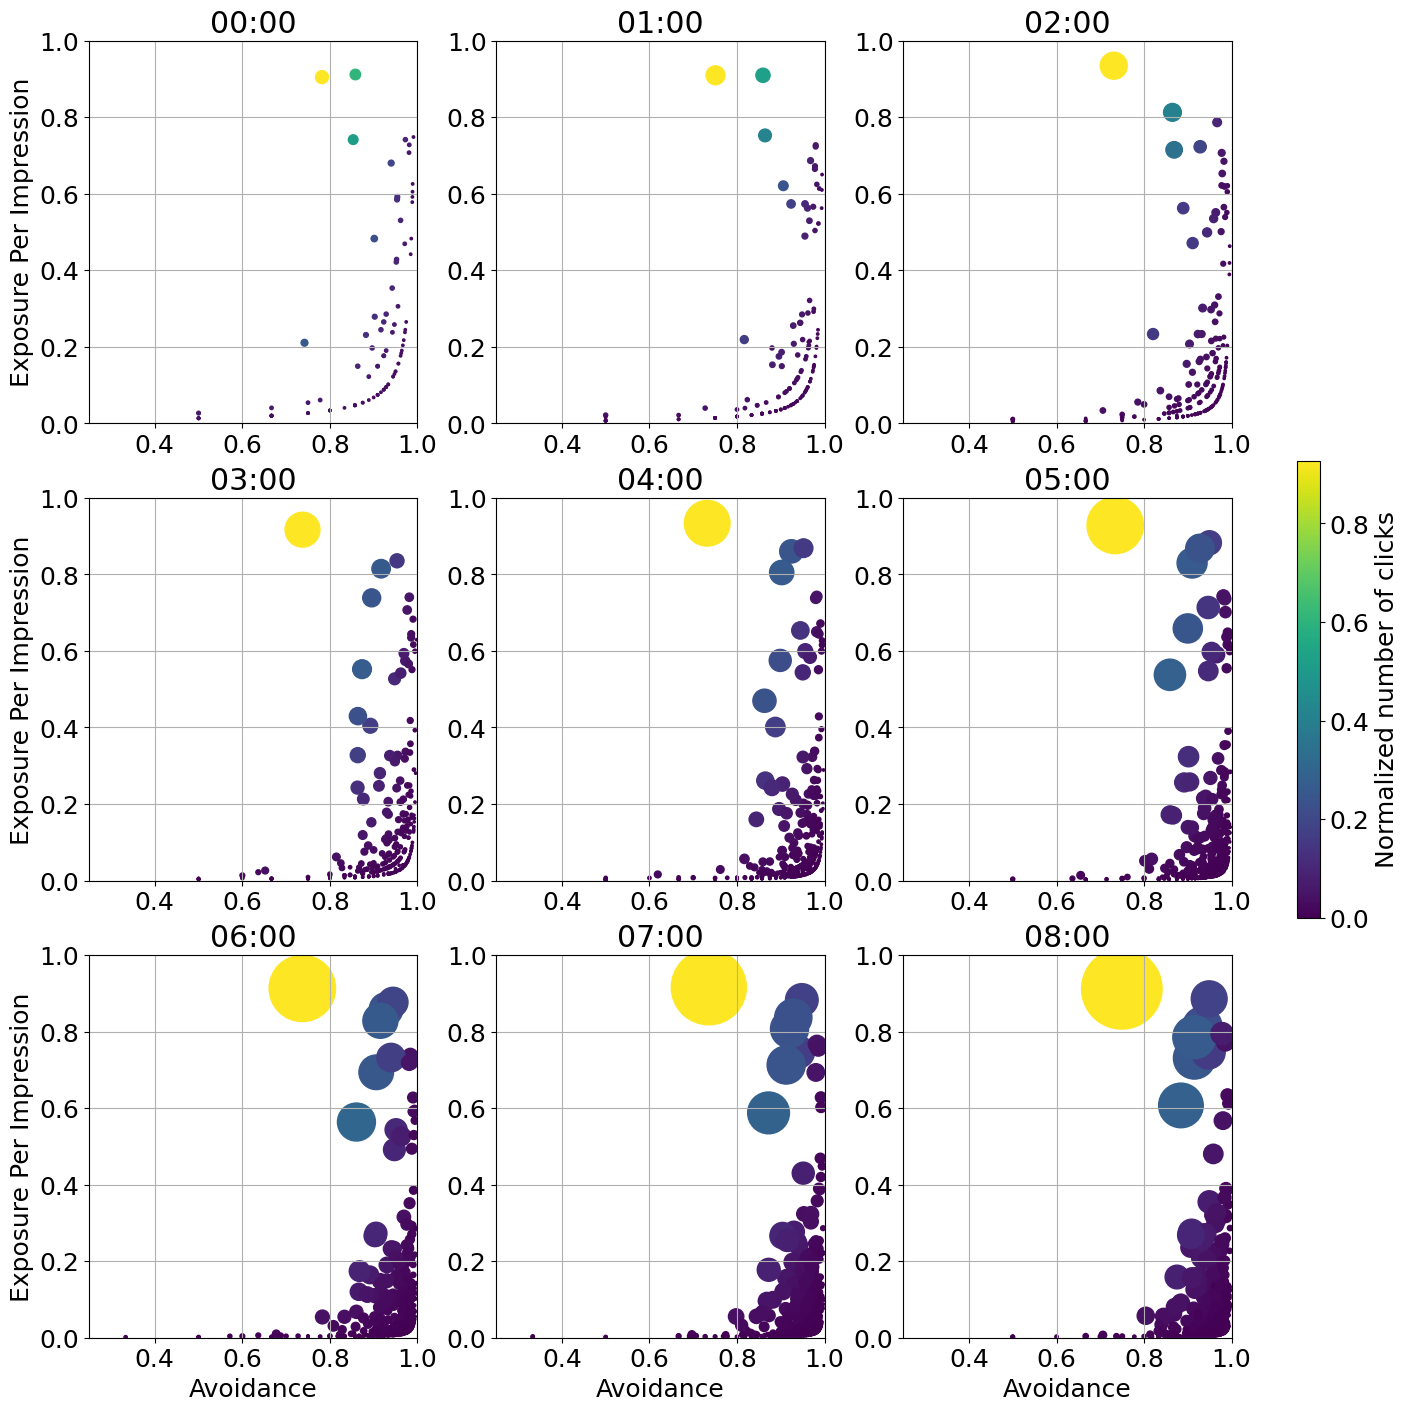

In [39]:
import matplotlib.pyplot as plt

# Set font size
plt.rcParams.update({'font.size': 18})

# Filter the DataFrame for the desired time range
time_filtered_df = df[(df['time_bucket_start_hour'].dt.hour >= 0) & (df['time_bucket_start_hour'].dt.hour <= 24)]

# Get unique time buckets within the specified range
time_buckets = time_filtered_df['time_bucket_start_hour'].dt.strftime('%H:%M').unique()

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(14, 14), constrained_layout=True)

# Iterate over the first 16 time buckets to create subplots
for i, time_bucket in enumerate(time_buckets[:9]):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    filtered_data = time_filtered_df[time_filtered_df['time_bucket_start_hour'].dt.strftime('%H:%M') == time_bucket]
    
    scatter = ax.scatter(
        filtered_data['av'],
        filtered_data['epi'],
        s=filtered_data['num_clicks']*3,  # Adjust size scaling as needed
        c=filtered_data['clicks_ratio'],
        cmap='viridis'
    )
    
    ax.set_title(time_bucket)
    ax.set_xlim(0.25, 1.00)  # Zoomed-in x-axis
    ax.set_ylim(0, 1)
    
    # Set x and y labels only on the first column and first row
    if col == 0:
        ax.set_ylabel('Exposure Per Impression')
    if row == 2:
        ax.set_xlabel('Avoidance')
        
    # Add grid lines
    ax.grid(True)

# Add a colorbar
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label='Normalized number of clicks')

# Show the plot
plt.show()

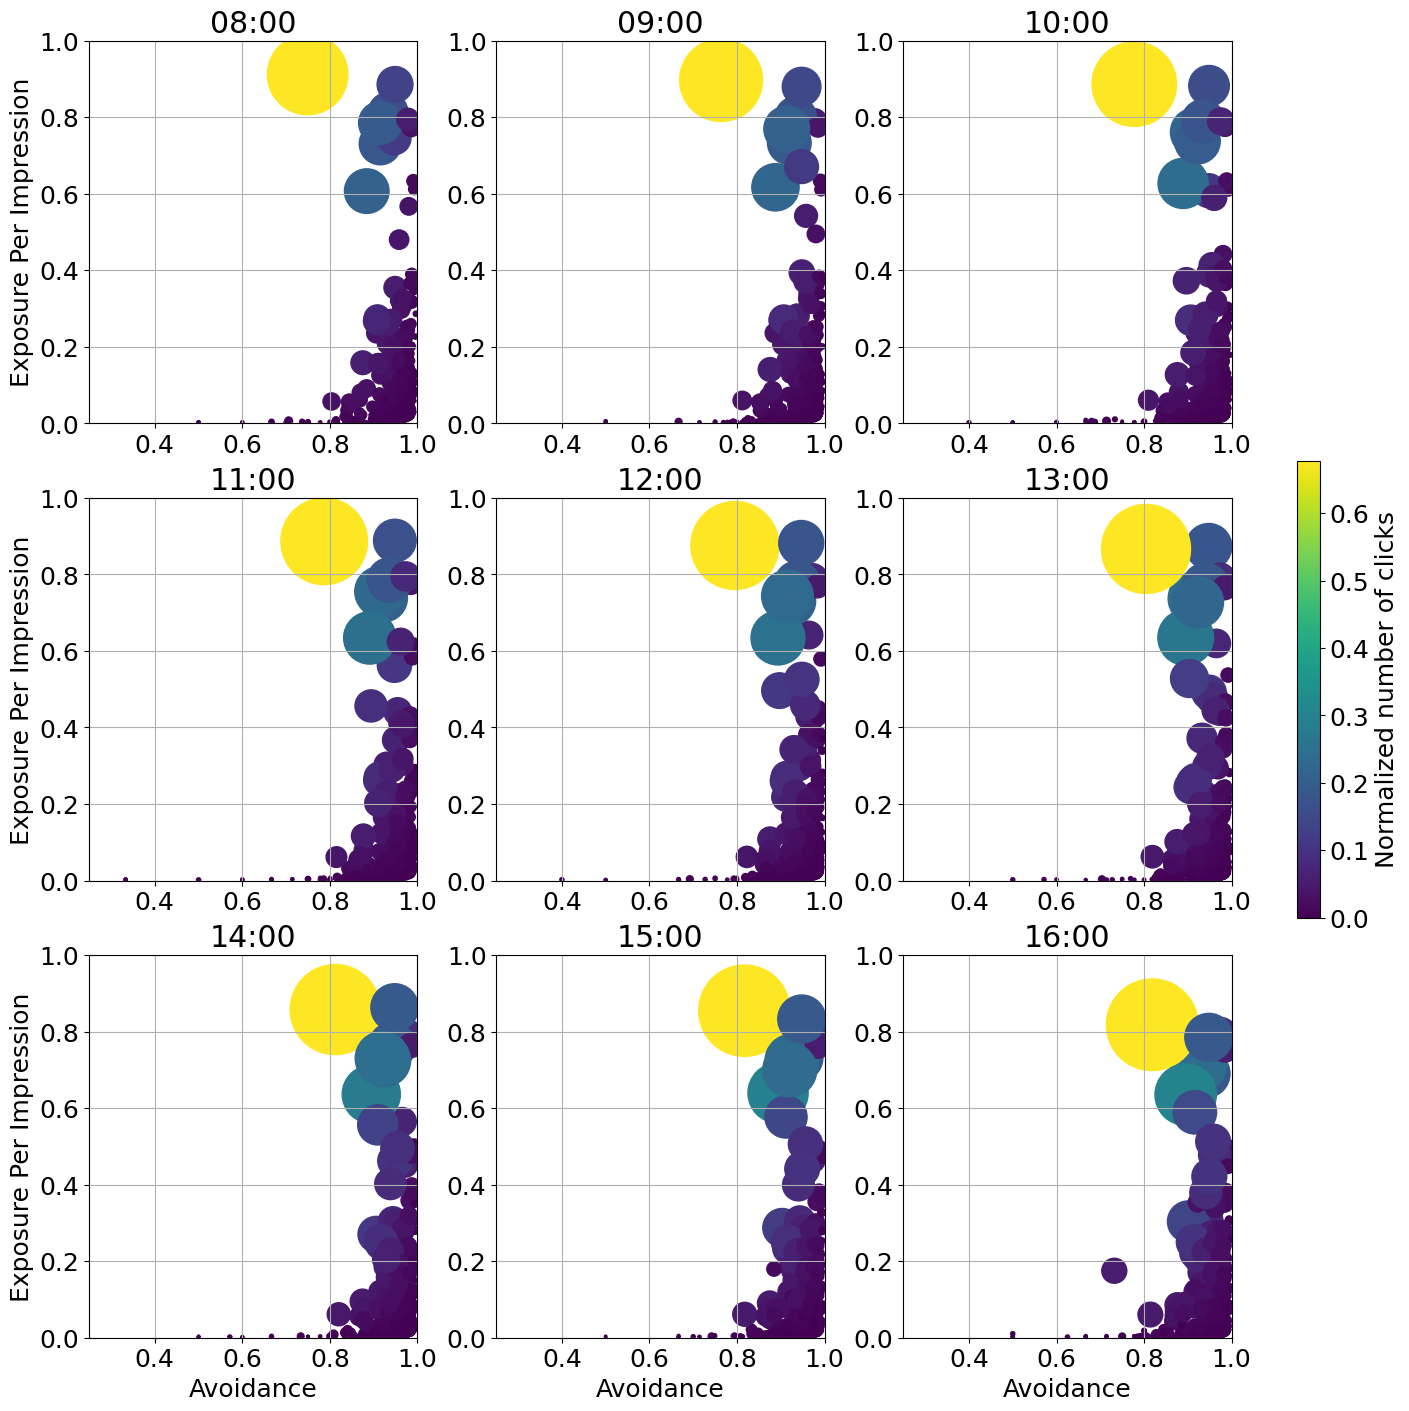

In [41]:
import matplotlib.pyplot as plt

# Set font size
plt.rcParams.update({'font.size': 18})

# Filter the DataFrame for the desired time range
time_filtered_df = df[(df['time_bucket_start_hour'].dt.hour >= 8) & (df['time_bucket_start_hour'].dt.hour <= 17)]

# Get unique time buckets within the specified range
time_buckets = time_filtered_df['time_bucket_start_hour'].dt.strftime('%H:%M').unique()

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(14, 14), constrained_layout=True)

# Iterate over the first 9 time buckets to create subplots
for i, time_bucket in enumerate(time_buckets[:9]):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    filtered_data = time_filtered_df[time_filtered_df['time_bucket_start_hour'].dt.strftime('%H:%M') == time_bucket]
    
    scatter = ax.scatter(
        filtered_data['av'],
        filtered_data['epi'],
        s=filtered_data['num_clicks'] * 3,  # Adjust size scaling as needed
        c=filtered_data['clicks_ratio'],
        cmap='viridis'
    )
    
    ax.set_title(time_bucket)
    ax.set_xlim(0.25, 1.00)  # Zoomed-in x-axis
    ax.set_ylim(0, 1)
    
    # Set x and y labels only on the first column and first row
    if col == 0:
        ax.set_ylabel('Exposure Per Impression')
    if row == 2:
        ax.set_xlabel('Avoidance')
        
    # Add grid lines
    ax.grid(True)

# Add a colorbar
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label='Normalized number of clicks')

# Show the plot
plt.show()

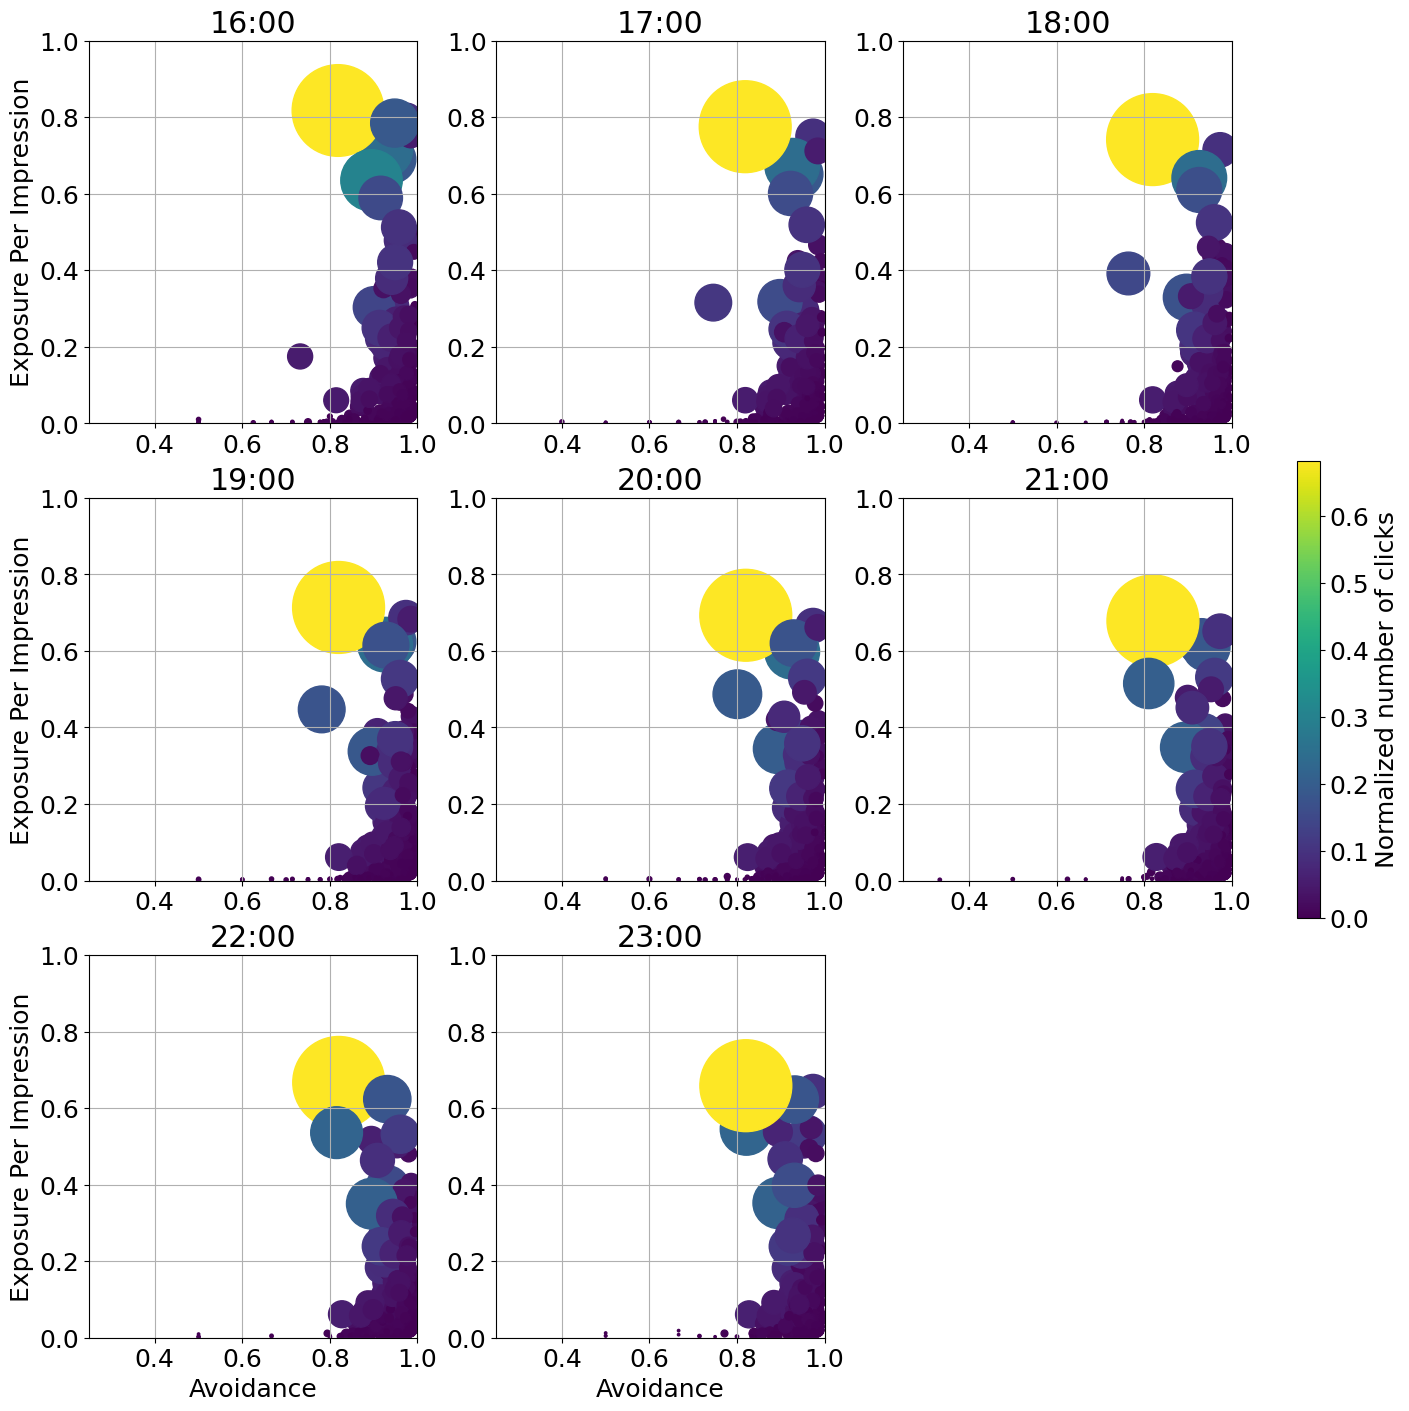

In [51]:
import matplotlib.pyplot as plt

# Set font size
plt.rcParams.update({'font.size': 18})

# Filter the DataFrame for the desired time range
time_filtered_df = df[(df['time_bucket_start_hour'].dt.hour >= 16) & (df['time_bucket_start_hour'].dt.hour <= 23)]

# Get unique time buckets within the specified range
time_buckets = time_filtered_df['time_bucket_start_hour'].dt.strftime('%H:%M').unique()

# Create a 3x3 grid of subplots (since there are 8 time buckets)
fig, axes = plt.subplots(3, 3, figsize=(14, 14), constrained_layout=True)

# Iterate over the time buckets to create subplots
for i, time_bucket in enumerate(time_buckets):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    filtered_data = time_filtered_df[time_filtered_df['time_bucket_start_hour'].dt.strftime('%H:%M') == time_bucket]
    
    scatter = ax.scatter(
        filtered_data['av'],
        filtered_data['epi'],
        s=filtered_data['num_clicks'] * 3,  # Adjust size scaling as needed
        c=filtered_data['clicks_ratio'],
        cmap='viridis'
    )
    
    ax.set_title(time_bucket)
    ax.set_xlim(0.25, 1.00)  # Zoomed-in x-axis
    ax.set_ylim(0, 1)
    
    # Set x and y labels only on the first column and first row
    if col == 0:
        ax.set_ylabel('Exposure Per Impression')
    if row == 2:
        ax.set_xlabel('Avoidance')
        
    # Add grid lines
    ax.grid(True)

# Remove any empty subplots
for j in range(i + 1, 9):
    fig.delaxes(axes.flatten()[j])

# Add a colorbar
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label='Normalized number of clicks')

# Show the plot
plt.show()